**Latar Belakang**

Bangkok adalah salah satu destinasi wisata terbesar di dunia, menarik jutaan pengunjung setiap tahunnya. Keberagaman budaya, kuliner, kehidupan malam, serta warisan sejarahnya menjadikan Bangkok sebagai magnet bagi wisatawan internasional maupun domestik. Dengan pesatnya pertumbuhan pariwisata ini, permintaan akan berbagai jenis akomodasi pun meningkat, dan salah satu pilihan populer di antara wisatawan adalah menggunakan layanan Airbnb. Airbnb adalah platform penyewaan tempat menginap secara daring yang menghubungkan pemilik properti dengan individu atau kelompok yang mencari akomodasi yang fleksibel, unik, dan sering kali lebih terjangkau dibandingkan hotel tradisional.

Melalui platform Airbnb, para wisatawan dapat menemukan berbagai macam tempat menginap, mulai dari kamar pribadi, apartemen, hingga rumah atau vila yang dapat disewa secara eksklusif. Keberagaman pilihan ini memungkinkan wisatawan untuk menyesuaikan pilihan akomodasi dengan kebutuhan mereka, baik dari segi fasilitas, lokasi, maupun anggaran. Bagi pemilik properti, Airbnb juga menjadi sarana untuk mendapatkan penghasilan tambahan dengan menyewakan properti mereka.

**Stakeholder**

**Tim Marketing Airbnb**

Tim marketing atau pemasaran akan memanfaatkan wawasan yang diperoleh untuk merancang strategi promosi yang lebih efektif, menyasar segmen pengguna yang paling tepat, dan meningkatkan daya tarik listing Airbnb di Bangkok bagi calon tamu.

**Rumusan dan Tujuan Masalah**

Airbnb ingin memahami lebih dalam mengenai bisnisnya di Bangkok dan karakteristik tiap listing yang tersedia. Analisis ini diharapkan dapat memberikan wawasan strategis yang membantu perusahaan untuk memperluas bisnis dengan lebih efektif dan menyasar pasar dengan lebih optimal ke depannya.

Sebagai seorang data analis, perannya yaitu untuk memberikan wawasan yang mendalam kepada tim pemasaran Airbnb Bangkok. Dari permasalahan diatas, dapat diperoleh rumusan masalah sebagai berikut:
1. Mengetahui Pesebaran Listing di Bangkok
2. Menganalisis Jumlah Tipe Kamar di Setiap Kawasan
3. Menganalisis harga sewa di setiap kawasan

**Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Dataset berisikan informasi mengenai host, lokasi dan ulasan Airbnb di Bangkok. Terdapat 15 kolom di dalam Dataset Airbnb listings Bangkok:
- `id`: Pengidentifikasian unik untuk listing Aibnb
- `name`: Nama properti 
- `host_id`: Pengenal unik airbnb untuk host (pemilik)
- `host_name`: Nama host (pemilik)
- `neighbourhood`: Lokasi properti (Lokasi tersebut dikodekan secara geografis menggunakan garis lintang dan garis bujur terhadap lokasi seperti yang ditentukan oleh shapefile digital terbuka atau publik.)
- `latitude`: titik lintang koordinat lokasi properti
- `longitude`: titik bujur koordinat lokasi properti
- `room_type`: Jenis kamar (Entire place, private room, hotel room, share room)
- `price`: Harga sewa properti
- `minimum_nights`: Minimum jumlah malam yang harus dipesan oleh penyewa
- `number_of_reviews`: jumlah ulasan yang diterima
- `last_review`: tanggal ulasan terakhir
- `calculated_host_listings_count`: jumlah listing yang dimiliki host dalam scrape saat ini di geografi kota/wilayah
- `availability_365`: jumlah hari properti tersedia dalam setahun
- `number_of_reviews_ltm`: jumlah ulasan yang dimiliki iklan tersebut (dalam 12 bulan terakhir)

**Data Understanding**

In [3]:
#Informasi mengenai dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

**Insight:**
- Kolom `name`, `host_name`, `last-review` dan `reviews_per_month` memiliki null values
- Kolom `last_review` memiliki tipe data object, dimana seharusnya datetime.

In [4]:
#Informasi Statistik Deskriptif
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


**Insight:**
- Pada kolom `price`, terdapat ourliers yaitu nilai minimum 0 dan nilai max yang terlalu besar yaitu 110000
- Pada kolom `minimum_nights`, terdapat outliers pada nilai max yaitu 1125
- Tipe kamar terbanyak terdapat pada kamar tipe `Entire home/apt` sebesar 8.912.

In [5]:
#Mengetahui Jumlah Unique Values
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,14794,"[Nice room with superb city view, Easy going l..."
3,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


**Insight:**
- Dataset Airbnb Listings Bangkok memiliki 17 kolom dan 15854 baris
- Beberapa kolom, yaitu, `last_review` dan `review_per_month` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN. Artinya, listing tidak memiliki atau mendapatkan review dari penyewa.

**Missing Values**

In [6]:
# Mengecek jumlah nilai hilang
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


In [7]:
#Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

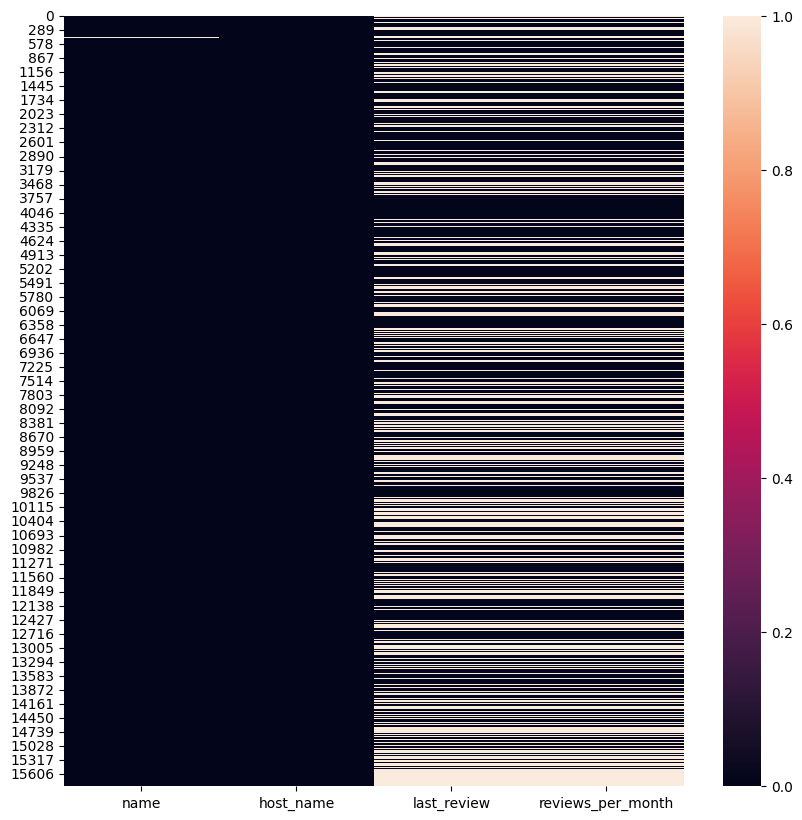

In [8]:
#Sebaran Missing Value di dalam Data
plt.figure (figsize=(10,10))
sns.heatmap(df[['name', 'host_name', 'last_review', 'reviews_per_month']].isna())

**Insight:**
- Missing value terdapat di kolom `name`, `host_name`, `last_review` dan `reviews_per_month`. 
- Missing value di kolom `name`, `host_name` memiliki proporosi yang cukup rendah (0,05% dan 0,06%) dibandingkan dengan kolom `last_review`, `reviews_per_month` yang mencapai 36,52% (kategori tinggi).
- Missing value di kolom `last_review` dan `reviews_per_month` memiliki sebaran yang berkaitan terdapat 5790 data yang kosong, jika data di `last_review` kosong, maka data di `reviews_per_month` juga kosong.

**DATA CLEANING**

**Handling Missing Values**

In [9]:
#menghapus data kosong pada kolom 'name'
df.dropna(subset=['name'], inplace= True)

In [10]:
#menghapus data kosong pada kolom 'host_name'
df.dropna (subset=['host_name'], inplace = True)

In [11]:
#menginput nilai 0 pada kolom 'reviews_per_month'
df['reviews_per_month'].fillna(0, inplace= True)

In [12]:
#melakukan drop pada kolom 'last_review'
df.drop('last_review', axis=1, inplace= True)

In [13]:
#Mengecek apakan missing value masih ada 
df.isna().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

**Handling Missing Values**

Terdapat 2 cara untuk menangani Missing Values:
- Pertama, menghapus baris/kolom yang berisi missing values. Missing values yang terdapat pada kolom `name` dan `host_name` memiliki proporsi yang cukup rendah, maka kita dapat menghapus baris tersebut. Lalu, untuk kolom `last_review` tidak akan digunakan untuk analisis, maka kolom tersebut juga akan di drop. 
- Kedua, mengisi Missing Value. Karena missing values pada `reviews_per_month` cukup besar, maka untuk kolom tersebut Kita dapat menggunakan cara ini. Untuk mengisi missing value dalam kolom `reviews_per_month`, kita mengisi dengan nilai 0. 

Setelah di handling dan di cek, sudah tidak terdapat missing value pada dataset ini.

**Handling Outliers**

In [14]:
#Function untuk mengecek apakah ada outliers
def Cek_Outliers(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)
    df_outliers = df[(df[col] < Lower_Fence) | (df[col] > Upper_Fence)]
    if len(df_outliers) == 0:
        return "No Outliers"
    else:
        return df_outliers

In [15]:
#Cek outliers pada kolom 'Availability_365'
Cek_Outliers(df, 'availability_365')

'No Outliers'

In [16]:
#Cek Outliers pada kolom 'Price'
Cek_Outliers(df, 'price')

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
17,17,66046,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatu Chak,13.822980,100.564840,Entire home/apt,122594,2,9,0.09,6,180,0
18,18,105042,Central Bangkok 3 Bedroom Apartment,545890,Henry,Khlong Toei,13.733780,100.563030,Entire home/apt,5680,28,148,1.08,1,334,0
19,19,1793000,The Duplex - Asoke- Luxury 92sqm,9407280,Timo,Vadhana,13.746680,100.561370,Entire home/apt,5034,21,287,2.59,1,349,3
34,34,978531,Urban Oasis in the heart of Bangkok,5309669,Apiradee,Sathon,13.722910,100.537590,Entire home/apt,5429,2,3,0.03,3,174,0
48,48,185364,Beautiful Wood Bangkok Resort House,889670,Narumon,Nong Chok,13.779000,100.836710,Entire home/apt,8658,1,0,0.00,1,363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,15756,786741911434733026,Private Home for 12-16 Guests 8 Parking,435016000,Tadchon,Lat Phrao,13.827958,100.591895,Entire home/apt,17900,2,0,0.00,10,362,0
15757,15757,786742271004207966,Private Hotel for 12-16 Guests,435016000,Tadchon,Chatu Chak,13.821809,100.563067,Private room,17900,2,0,0.00,10,362,0
15765,15765,786834873763460489,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.735632,100.567862,Entire home/apt,7589,1,0,0.00,44,364,0
15766,15766,786852847114140309,"Cozy 1 bedroom 40 sqm, central",434168399,Krittika,Vadhana,13.734753,100.566682,Entire home/apt,7589,1,0,0.00,44,364,0


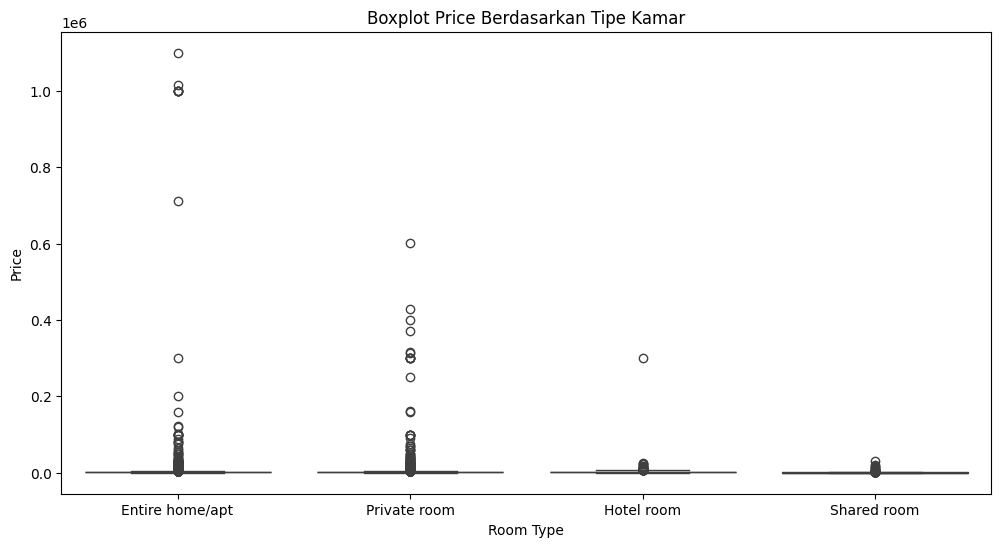

In [17]:
#Outliers antara 'price' dan 'room_type'

plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Boxplot Price Berdasarkan Tipe Kamar')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [18]:
#mengecek harga di tipe kamar Entire Home/apt
harga_entirehome = df.loc[df['room_type'] == 'Entire home/apt', ['price']].sort_values(by='price', ascending=False)
display(harga_entirehome.head())
display (harga_entirehome.tail())

,price
12868,1100000
12300,1014758
4620,1000000
1239,1000000
6289,1000000


,price
11215,348
9657,346
1481,346
5246,337
10222,332


In [19]:
#mengecek harga di tipe kamar private room
harga_privateroom = df.loc[df['room_type'] == 'Private room', ['price']].sort_values(by='price', ascending=False)
display(harga_privateroom.head())
display (harga_privateroom.tail())

,price
4373,600700
11885,429443
12792,400717
6549,372227
6760,314899


,price
11268,315
7831,310
8974,304
9529,300
15551,278


In [20]:
#mengecek harga di tipe kamar Hotel Room
harga_hotelroom = df.loc[df['room_type'] == 'Hotel room', ['price']].sort_values(by='price', ascending=False)
display(harga_hotelroom.head())
display (harga_hotelroom.tail())

,price
2668,300000
3415,24390
6281,23671
6283,23629
6282,23029


,price
8445,326
2748,318
2770,318
8983,318
11103,0


In [21]:
#mengecek harga di tipe kamar Hotel Room
harga_hotelroom = df.loc[df['room_type'] == 'Hotel room', ['price']].sort_values(by='price', ascending=False)
display(harga_hotelroom.head())
display (harga_hotelroom.tail())

,price
2668,300000
3415,24390
6281,23671
6283,23629
6282,23029


,price
8445,326
2748,318
2770,318
8983,318
11103,0


In [22]:
#mengecek harga di tipe kamar shared room
harga_sharedroom = df.loc[df['room_type'] == 'Shared room', ['price']].sort_values(by='price', ascending=False)
display(harga_sharedroom.head())
display (harga_sharedroom.tail())

,price
7857,31200
6868,20895
2430,17316
5577,13852
5079,13000


,price
9636,303
15473,295
15401,280
15455,280
15456,280


**Insight:**
- Outliers terdapat pada semua tipe kamar, harga paling besar terdapat pada tipe kamar Entire place/apt sebesar 1100000. Adanya outliers ini bisa saja terjadi karena listing memang memberikan harga tinggi untuk properti yang disewakan.
- Outliers terkecil terdapat pada tipe kamar Hotel room, yaitu 0 hal ini tidak mungkin terjadi. Tidak mungkin suatu properi disewakan dengan harga 0. Untuk menangani hal tersebut, akan dilakukan drop. 

In [23]:
#menghapus outliers pada tipe kamar hotel room yang punya nilai 0
df.drop(df[(df['room_type'] == 'Hotel room') & (df['price']== 0)].index, inplace=True)

**DATA DUPLICATE**

In [24]:
#Mengecek data duplikat
df.duplicated().sum()

np.int64(0)

In [25]:
# Mengecek Duplikat berdasarkan lokasi, neighbourhood, harga, nama, dan room type
data_duplicate = df[df.duplicated(subset=['latitude', 'longitude', 'neighbourhood', 'price', 'name', 'room_type'], keep=False)]
display('Jumlah data duplikat:', len(data_duplicate))
data_duplicate.head()

'Jumlah data duplikat:'

68

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
486,486,4639962,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.73313,100.56259,Private room,4871,1,27,0.28,12,364,1
1162,1162,7717620,"Sukhumvit, 5 min walk to Sky Train Asoke Station",24021888,Maitria Hotel Sukhumvit 18,Khlong Toei,13.73313,100.56259,Private room,4871,1,20,0.30,12,364,0
2119,2119,13777582,"Studio with Zen garden view (30sqm), LUXX Silom",68154488,Dusadee,Bang Rak,13.72633,100.52531,Hotel room,1777,1,1,0.01,62,271,0
3329,3329,18396802,Studio for 2PAX: 1-Min from BTS Nana,3773805,Danai And BicGy,Khlong Toei,13.73937,100.55521,Entire home/apt,2470,2,63,0.93,13,325,1
3473,3473,19000129,Studio for 2PAX: 1-Min from BTS Nana,3773805,Danai And BicGy,Khlong Toei,13.73937,100.55521,Entire home/apt,2470,2,71,1.06,13,343,18


In [26]:
data_duplicate.groupby(['name','latitude','longitude','host_name'])[['id']].count()

id
name                                               latitude  longitude  host_name                     
15days!New!Bang Phlat MRT 600m/swiming pool/gym    13.788938 100.503600 Curry                        2
30days!  Sukhumvit NANA spacious 1BR 2PPL near BTS 13.750300 100.555503 Kara                         1
                                                                        Nana                         1
                                                                        Noons                        1
30days! Sukhumvit NANA spacious 2BR 4PPL near BTS  13.750300 100.555503 Curry                        2
Budget Hotel in Center of Bangkok @HAP             13.720197 100.548159 Tachin                       2
Family Room for 4 People                           13.740168 100.556320 Rachan                       2
Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    13.756184 100.568269 Tricia                       1
                                                                        Willam                       2
                                                   13.757097 100.568486 Alice                        2
NA BANGLAMPOO GUEST HOUSE                          13.762790 100.497900 Yui                          2
New!  city center / ASOK Station / 2PPL 1BR        13.723233 100.561119 Curry                        1
                                                                        Nana                         1
New! Gateway/ Bangkok University 1BR 2PPL near BTS 13.716669 100.584967 Nana                         3
                                                                        Noons                        1
                                                   13.716847 100.584781 Curry                        5
                                                                        Nana                         1
                                                                        Noons                        2
ONLY 10 min walk BTS Ari / BAANNUENG @ari5[Suite]  13.780780 100.539720 First                        2
One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK/GYM 13.756598 100.540777 Curry                        2
Private Room in Sukhumvit: BTS Phrom Phong         13.729510 100.572447 Apichaya                     2
Sale! BTS On Nut/Sukhumvit 87/loft/pool/gym/wifi   13.701565 100.603293 Curry                        3
                                                                        Nana                         1
Sathon Luxury 2 br/China Town/Icon Siam            13.710777 100.519891 Alex                         1
                                                                        Alice                        3
                                                                        Tricia                       3
                                                                        Willam                       2
Sathon Luxury Loft/China Town/Icon Siam            13.710777 100.519891 Alex                         2
                                                                        Alice                        1
Studio for 2PAX: 1-Min from BTS Nana               13.739370 100.555210 Danai And BicGy              2
Studio with Zen garden view (30sqm), LUXX Silom    13.726330 100.525310 Dusadee                      2
Sukhumvit, 5 min walk to Sky Train Asoke Station   13.733130 100.562590 Maitria Hotel Sukhumvit 18   2
The Lux Ladprao 10                                 13.809450 100.566340 Visani                       2
The Lux Ladpraw 10                                 13.809450 100.566340 Visani                       2
White House Hostel Deluxe Room Shared Bathroom     13.753400 100.538220 Piti                         2
small1                                             13.920720 100.575780 Soo                          2

**Insight:**
- Dari data duplikat diatas, dapat dilihat bahwa properti dengan nama yang sama dan lintang dan bujur yang sama terdaftar dengan properti yang berbeda, terlihat pada ID nya berbeda.
- Padahal sebenarnya properti ini sama dibuktikan dengan pemiliknya yang sama, harga yang sama, ulasan sama dan tipe ruangan yang sama. 
- Kita bisa menghandlingnya dengan menghapus data duplikat.

In [27]:
# Menghapus Duplicate Data
df.drop_duplicates(subset=['longitude', 'latitude','price','name','room_type'], keep='first', inplace=True, ignore_index=False)

**Membuat kolom Baru**

Untuk memudahkan analisis, kita akan membagi Kota bangkok menjadi 3 Zona yaitu, Zone Inner, Middle dan Outer Bangkok. 

Sumber: https://www.mdpi.com/2071-1050/13/20/11426 


In [28]:
df['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

In [29]:
def label(neighbourhood):
    if neighbourhood in ['Chatu Chak','Bang Sue','Dusit','Bangkok Noi','Bangkok Yai','Bang Rak','Khlong Toei','Ratchathewi','Pom Prap Sattru Phai','Phra Nakhon','Phaya Thai','Huai Khwang','Din Daeng','Sathon','Parthum Wan', 'Khlong San','Thon buri','Bang Kho laen','Yan na wa','Samphanthawong','Vadhana']:
        return 'Inner Zone'
    elif neighbourhood in['Sai Mai','Bang Kapi','Lat Phrao','Bang Khen','Bueng Kum','Chom Thong','Bang Na','Pra Wet','Suanluang','Saphan Sung','Khan Na Yao','Wang Thong Lang','Thung khru','Bang Khae','Bang Phlat','Phra Khanong','Rat Burana','Phasi Charoen']:
        return 'Middle Zone'
    elif neighbourhood in['Nong Chok','Lat Krabang','Min Buri','Khlong Sam Wa','Taling Chan','Lak Si','Don Mueang','Bang Khun thain','Bang Bon','Nong Khaem','Thawi Watthana']:
        return 'Outer Zone'
    else :
        return 'Others'

df['Zona'] = df['neighbourhood'].apply(label)


In [30]:
#mengecek apakah kolom 'District Zone' sudah terbentuk
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Zona
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0,Inner Zone
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0,Middle Zone
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0,Middle Zone
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1,Inner Zone
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0,Middle Zone


In [31]:
#melakukan drop pada kolom 'Unamed: 0'
df.drop('Unnamed: 0', axis=1, inplace= True)

In [32]:
#Mengecek perubahan setelah dilakukan data cleaning 
df.shape

(15801, 16)

In [33]:
#mengecek apakah kolom 'Unnamed: 0' sudah terhapus
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Zona
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0,Inner Zone
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0,Middle Zone
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0,Middle Zone
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1,Inner Zone
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0,Middle Zone


In [34]:
#Download file Cleaning
df.to_csv('airbnblistingsbangkokcleaned.csv')

**ANALISIS DATA**

**1. Analisis Pesebaran Listing di Bangkok**

Pemahaman mengenai persebaran listing Airbnb di Bangkok akan memberikan gambaran mengenai area yang paling diminati oleh wisatawan. Dengan menganalisis distribusi geografis ini, kita dapat mengidentifikasi wilayah dengan konsentrasi listing yang tinggi, seperti pusat kota atau daerah yang dekat dengan tempat-tempat wisata utama. Analisis ini penting untuk memahami tren preferensi lokasi dan potensi area yang masih dapat dikembangkan.

Pertanyaan:
1. Berapa total listing Airbnb di Bangkok?
2. Bagaimana distribusi listing di Bangkok?


In [35]:
df.shape[0]

15801

In [36]:
print (f'Total jumlah listing Airbnb di Bangkok: {df.shape[0]}')

Total jumlah listing Airbnb di Bangkok: 15801


In [37]:
#Jumlah listing berdasarkan Zona
df_Zona = df['Zona'].value_counts()
df_Zona

Zona
Inner Zone     12268
Middle Zone     2887
Outer Zone       646
Name: count, dtype: int64

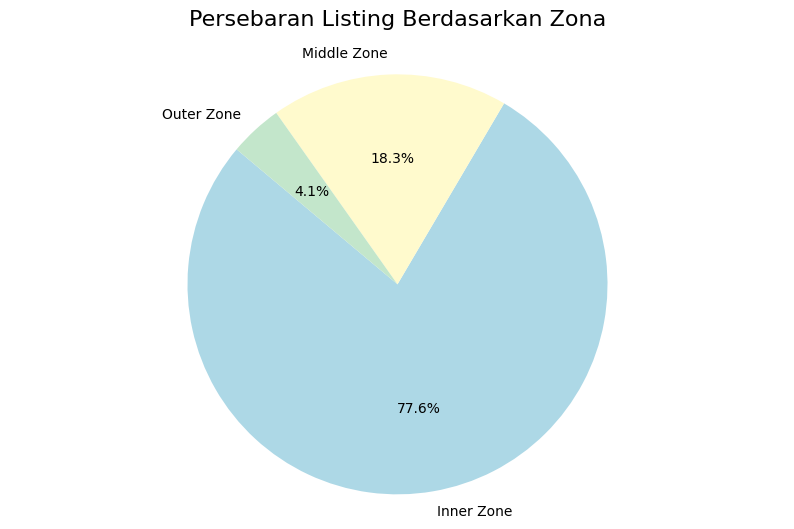

In [38]:
#Visualisasi listing berdasarkan Zona
# Daftar warna 
colors = ['#add8e6', '#fffacd', '#c3e6cb']

plt.figure(figsize=(10, 6))
plt.title('Persebaran Listing Berdasarkan Zona', pad=20, size=16)
plt.pie(
    df_Zona, 
    labels=df_Zona.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors  
)
plt.axis('equal')  # Membuat pie chart bulat
plt.show()

In [40]:
#groupby listing berdasarkan neoighbourhood
neighbourhood = df.groupby(['neighbourhood','Zona'])[['name']].count().sort_values(by='name',ascending=False).reset_index()

#Menampilkan top 5
top_5 = neighbourhood.head()
display(top_5)
bottom_5 = neighbourhood.tail()
display(bottom_5)

#Menampilkan bottom 5
bottom_5_by_city = neighbourhood.groupby('Zona').tail()
display(bottom_5_by_city)


,neighbourhood,Zona,name
0,Vadhana,Inner Zone,2148
1,Khlong Toei,Inner Zone,2084
2,Huai Khwang,Inner Zone,1122
3,Ratchathewi,Inner Zone,1108
4,Bang Rak,Inner Zone,826


,neighbourhood,Zona,name
45,Bang Khun thain,Outer Zone,21
46,Nong Chok,Outer Zone,14
47,Thawi Watthana,Outer Zone,12
48,Nong Khaem,Outer Zone,9
49,Bang Bon,Outer Zone,5


,neighbourhood,Zona,name
25,Bang Kho laen,Inner Zone,140
27,Pom Prap Sattru Phai,Inner Zone,123
29,Samphanthawong,Inner Zone,114
32,Dusit,Inner Zone,91
33,Bangkok Yai,Inner Zone,90
38,Bueng Kum,Middle Zone,54
39,Rat Burana,Middle Zone,53
41,Saphan Sung,Middle Zone,45
42,Sai Mai,Middle Zone,40
44,Thung khru,Middle Zone,23


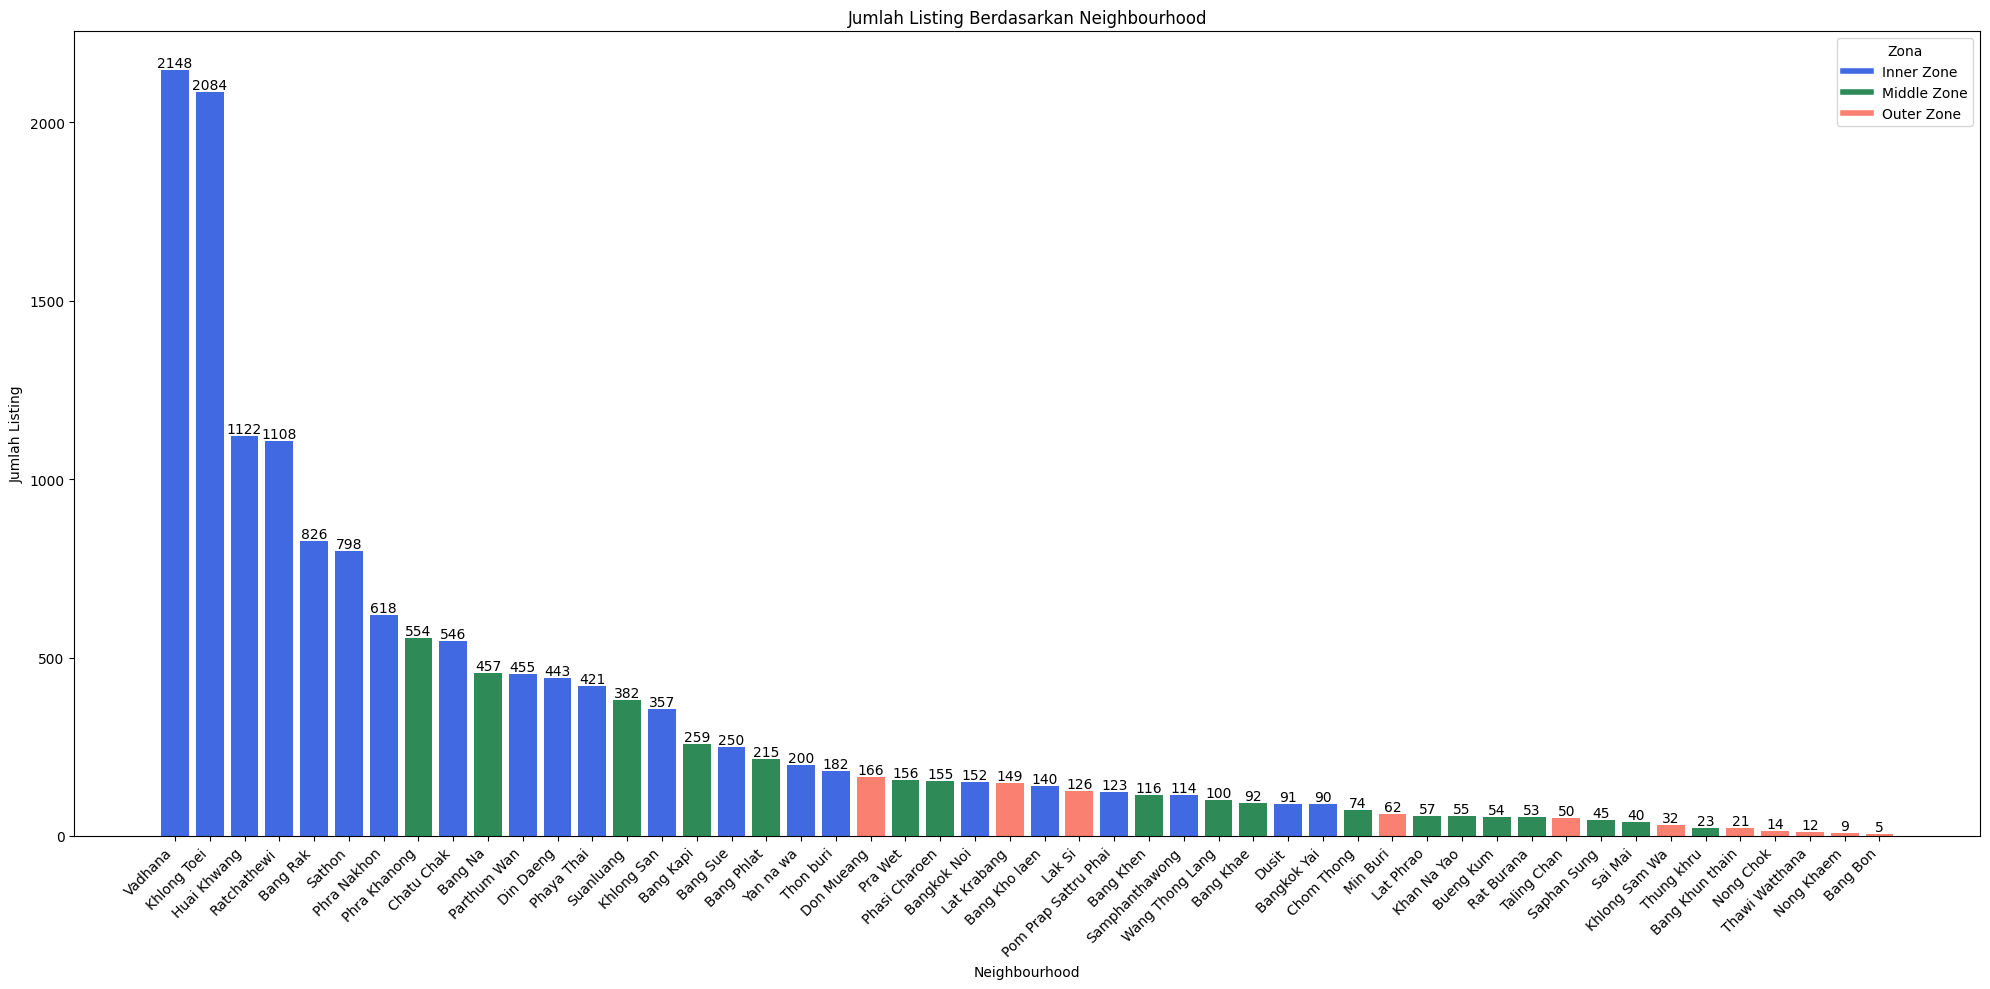

In [41]:
#Grafik Visualisasi Listing berdasarkan Neighbourhood 

# Menghitung jumlah listing per Neighbourhood
neighbourhood_counts = df['neighbourhood'].value_counts()

# Define colors for each 'Zona'
zone_colors = {'Inner Zone': 'royalblue', 'Middle Zone': 'seagreen', 'Outer Zone': 'salmon'}

# Merge the neighbourhood counts with the corresponding Zona
neighbourhood_zones = df[['neighbourhood', 'Zona']].drop_duplicates()
neighbourhood_counts_df = neighbourhood_counts.rename_axis('neighbourhood').reset_index(name='counts')
neighbourhood_counts_df = neighbourhood_counts_df.merge(neighbourhood_zones, on='neighbourhood', how='left')

# Map colors based on 'Zona' and prepare to plot
neighbourhood_counts_df['color'] = neighbourhood_counts_df['Zona'].map(zone_colors)

# Plot with colors based on Zona
plt.figure(figsize=(20, 10))
bars = plt.bar(neighbourhood_counts_df['neighbourhood'], neighbourhood_counts_df['counts'], color=neighbourhood_counts_df['color'])
plt.title('Jumlah Listing Berdasarkan Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45, ha='right')

# Tambahkan angka di atas setiap balok
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)

# Tambahkan legenda untuk setiap Zona
plt.legend(handles=[plt.Line2D([0], [0], color=color, lw=4) for color in zone_colors.values()], 
           labels=zone_colors.keys(), title="Zona")

plt.tight_layout()
plt.show()

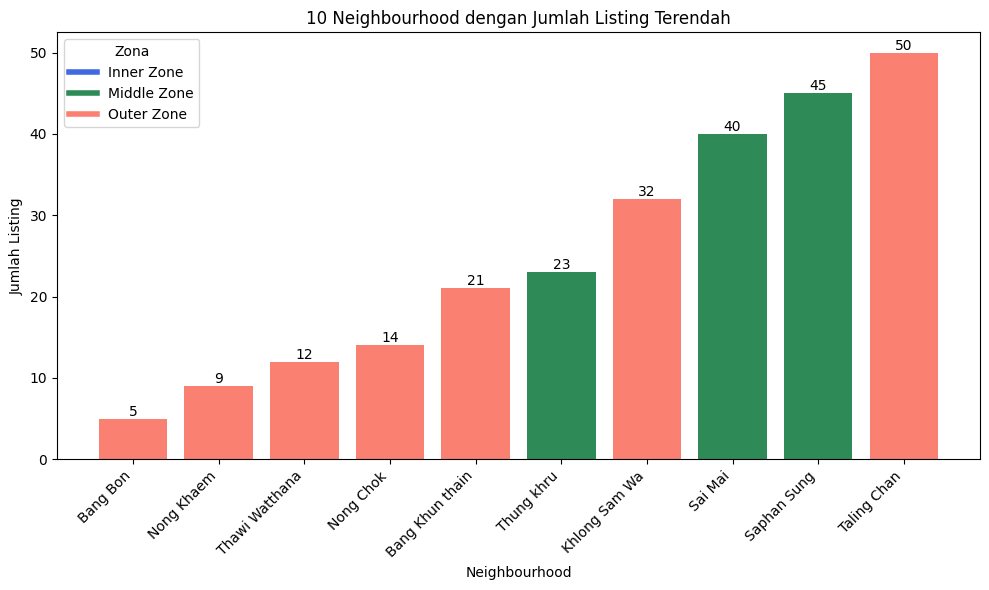

In [ ]:
#Visualisasi 10 Neighbourhood dengan listings terendah

# Mengambil 10 neighbourhood dengan jumlah listing terendah
bottom_10 = neighbourhood.nsmallest(10, 'name')

# Menentukan warna berdasarkan Zona
zone_colors = {'Inner Zone': 'royalblue', 'Middle Zone': 'seagreen', 'Outer Zone': 'salmon'}
bottom_10['color'] = bottom_10['Zona'].map(zone_colors)

# Membuat grafik batang dengan warna berdasarkan Zona
plt.figure(figsize=(10, 6))
bars = plt.bar(bottom_10['neighbourhood'], bottom_10['name'], color=bottom_10['color'])
plt.title('10 Neighbourhood dengan Jumlah Listing Terendah')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45, ha='right')

# Tambahkan angka di atas setiap balok
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)

# Tambahkan legenda untuk setiap Zona
plt.legend(handles=[plt.Line2D([0], [0], color=color, lw=4) for color in zone_colors.values()], 
           labels=zone_colors.keys(), title="Zona")

plt.tight_layout()
plt.show()


**Insight:**

Berdasarkan hasil analisis dan visualisasi diatas, didapatkan:
1. Jumlah listing terbanyak terdapat pada **Inner Zone** sebanyak **12268** dan persentase sebarannya sebesar **77.6%**
2. Jumlah listing terbanyak terdapat pada **Inner Zone** dan daerahnya yaitu: **Vadhana, Khlong Tei, Huai Khwang, Ratchathewi dan Bangrak**
3. Jumlah listing terendah terdapat pada **Outer Zone**  dan daerahnya yaitu: **Bang Bon, Nong Khaem, Thawi Watthana, Nong Chok dan Bang Khun Thain**
4. Distribusi listing di setiap zona masih belum merata. Pada inner zone masih ada daerah yang memiliki penginapan <100, di middle zone masih terdapat daerah yang memiliki penginapan <50 dan di outer zone masih terdapat daerah yang memiliki penginapan <10

Karakteristik masing-masing Zona:

**1. Inner Zone:** Wilayah ini adalah pusat bisnis utama, di mana kegiatan ekonomi dan hiburan terpusat. Banyak gedung perkantoran, pusat perbelanjaan besar, tempat wisata, dan kawasan kehidupan malam yang aktif di zona ini. Zona ini memiliki konsentrasi populasi yang padat, serta infrastruktur urban yang maju, sehingga daerah ini memiliki tingkat urbanisasi tertinggi dibandingkan zona lainnya.

**2. Middle Zone:** Merupakan wilayah penunjang dari Inner Zone yang juga mengakomodasi pusat komersial, meskipun skalanya lebih kecil daripada di Inner Zone. Meski tidak sepadat Inner Zone, Middle Zone tetap memiliki konsentrasi penduduk yang cukup tinggi, dengan akses yang baik ke pusat kota serta fasilitas umum seperti sekolah, rumah sakit, dan area komersial.

**3. Outer Zone:** Wilayah ini mencakup pinggiran kota Bangkok, yang terletak lebih jauh dari pusat kota dan memiliki karakteristik yang berbeda dengan zona-zona lain yang lebih terurbanisasi. Outer Zone memiliki lahan terbuka yang lebih luas, dengan aktivitas pertanian, ruang hijau, dan ruang terbuka untuk rekreasi. Beberapa wilayah juga mencakup daerah aliran sungai (DAS). Kepadatan penduduk di daerah ini juga rendah.

Sumber: https://www.mdpi.com/2071-1050/13/20/11426  


**2. Analisis Tipe Kamar di Bangkok**

Analisis terhadap tipe kamar di setiap Zona dan daerah membantu untuk memahami preferensi wisatawan serta ketersediaan pilihan akomodasi yang ditawarkan. Hal ini penting bagi pemilik properti dan pihak Airbnb dalam menentukan jenis akomodasi yang sebaiknya disediakan di tiap daerah, serta bagi wisatawan untuk memilih akomodasi yang sesuai dengan preferensi mereka.

Pertanyaan:
1. Tipe kamar jenis apa yang paling banyak di sewakan?
2. Bagaimana distribusi tipe kamar di setiap Zona?

In [42]:
#Jumlah masing-masing tipe kamar
df_room_type = df['room_type'].value_counts()
df_room_type

room_type
Entire home/apt    8879
Private room       5754
Hotel room          646
Shared room         522
Name: count, dtype: int64

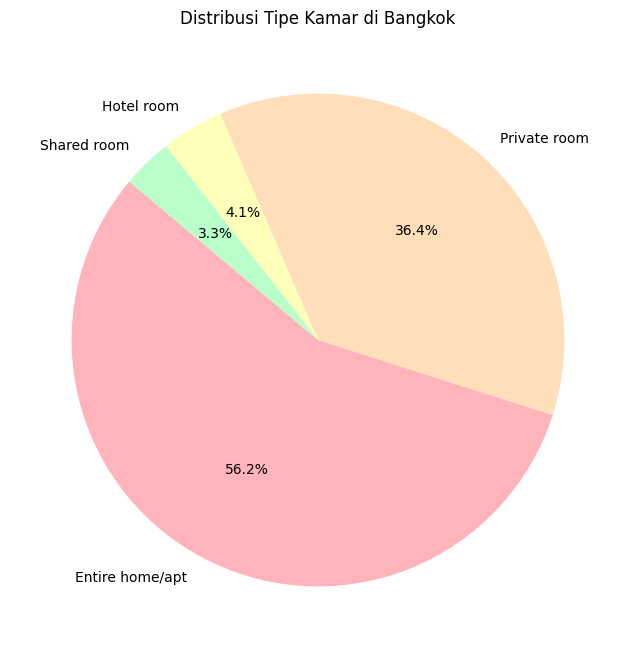

In [43]:
#Visualisasi Tipe Kamar
#Mengatur warnanya menjadi pastel
pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_room_type, labels=df_room_type.index, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title("Distribusi Tipe Kamar di Bangkok")
plt.show()

In [44]:
#Jumlah tipe kamar per Zona
room_type_zone = df.groupby('Zona')['room_type'].value_counts().reset_index(name='count')
room_type_zone

,Zona,room_type,count
0,Inner Zone,Entire home/apt,7141
1,Inner Zone,Private room,4098
2,Inner Zone,Hotel room,581
3,Inner Zone,Shared room,448
4,Middle Zone,Entire home/apt,1538
5,Middle Zone,Private room,1266
6,Middle Zone,Shared room,47
7,Middle Zone,Hotel room,36
8,Outer Zone,Private room,390
9,Outer Zone,Entire home/apt,200


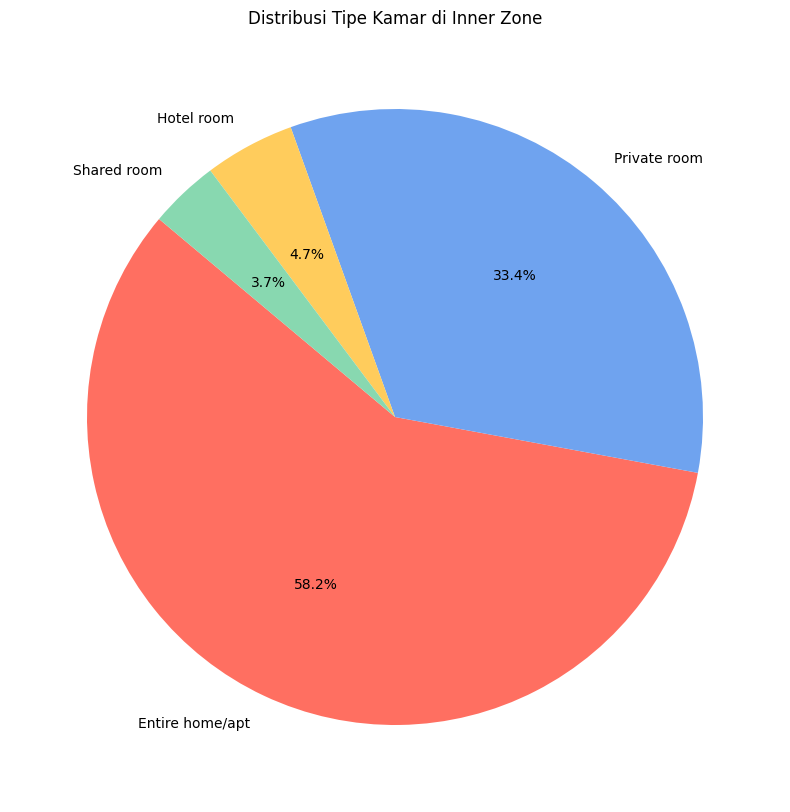

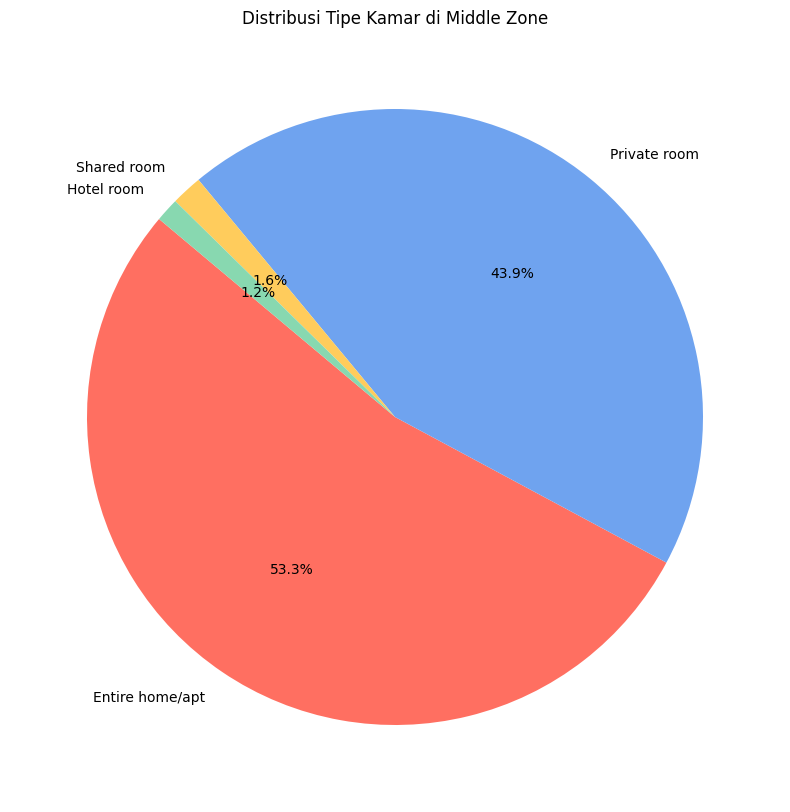

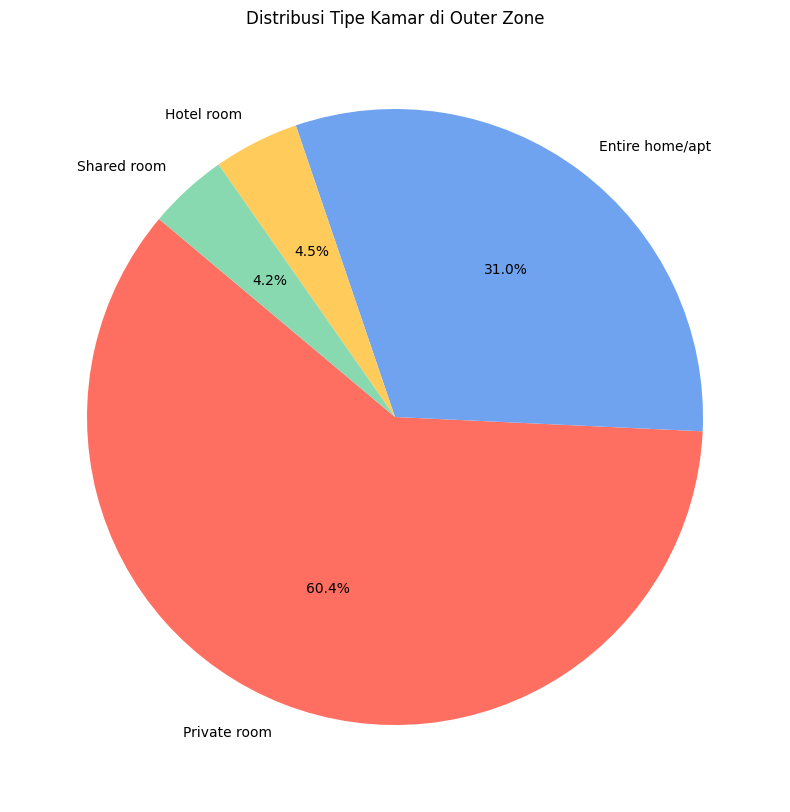

In [45]:
#Visualisasi tipe kamar per zona

pastel_colors = ['#FF6F61', '#6FA3EF', '#FFCC5C', '#88D8B0', '#FF9AA2']
for zone in room_type_zone['Zona'].unique():
    zone_data = room_type_zone[room_type_zone['Zona'] == zone]
    
    plt.figure(figsize=(10, 10))
    plt.pie(zone_data['count'], labels=zone_data['room_type'], autopct='%1.1f%%', startangle=140, colors=pastel_colors)
    plt.title(f"Distribusi Tipe Kamar di {zone}")
    plt.show()

In [ ]:
#Jumlah tipe kamar per Neigbourhood
room_type_neighbourhood = df.groupby(['room_type', 'neighbourhood', 'Zona']).size().reset_index(name='count')
room_type_neighbourhood

#Mendapatkan Neighbourhood dengan jumlah tertinggi untuk setiap tipe kamar
neighbourhood_roomtype_top = room_type_neighbourhood.loc[room_type_neighbourhood.groupby('room_type')['count'].idxmax()]
neighbourhood_roomtype_top

,room_type,neighbourhood,Zona,count
22,Entire home/apt,Khlong Toei,Inner Zone,1509
79,Hotel room,Vadhana,Inner Zone,104
128,Private room,Vadhana,Inner Zone,540
155,Shared room,Phra Nakhon,Inner Zone,131


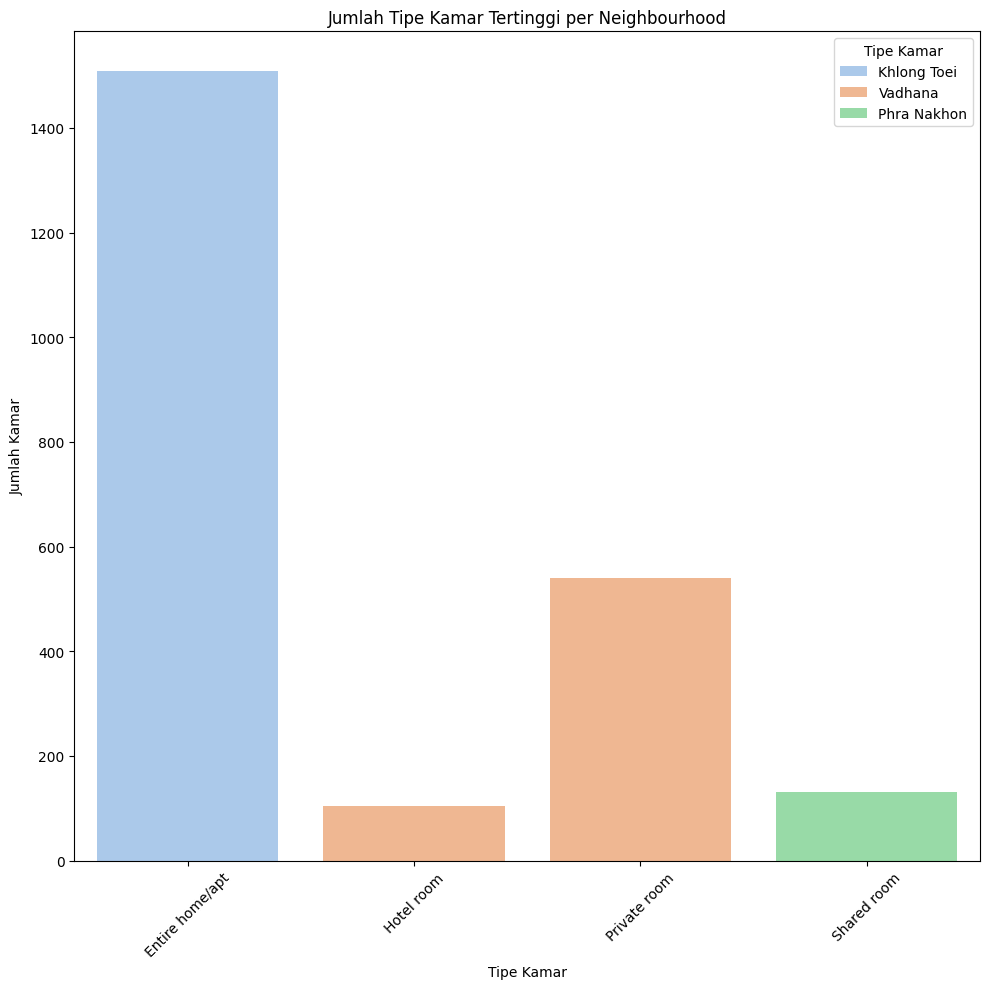

In [ ]:
#Visualisasi jumlah tipe kamar tertinggi per neighbourhood

plt.figure(figsize=(10, 10))
sns.barplot(data=neighbourhood_roomtype_top, x='room_type', y='count', hue= 'neighbourhood', palette='pastel')

# Menambahkan judul dan label
plt.title('Jumlah Tipe Kamar Tertinggi per Neighbourhood')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Kamar')
plt.legend(title='Tipe Kamar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Mendapatkan Neighbourhood dengan jumlah terendah untuk setiap tipe kamar
neighbourhood_roomtype_bottom = room_type_neighbourhood.loc[room_type_neighbourhood.groupby('room_type')['count'].idxmin()]
neighbourhood_roomtype_bottom

,room_type,neighbourhood,Zona,count
0,Entire home/apt,Bang Bon,Outer Zone,2
50,Hotel room,Bang Kapi,Middle Zone,1
81,Private room,Bang Bon,Outer Zone,3
132,Shared room,Bang Khen,Middle Zone,1


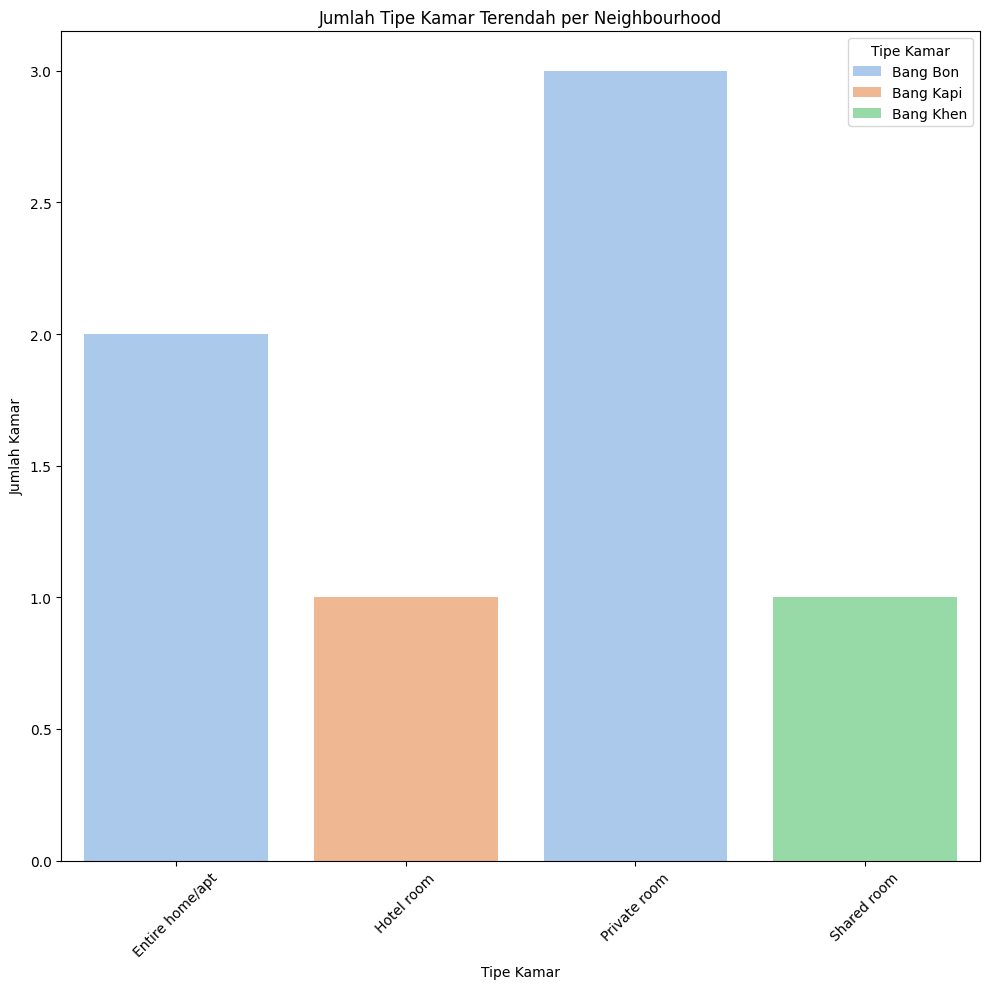

In [ ]:
#Visualisasi jumlah tipe kamar tertinggi per neighbourhood

plt.figure(figsize=(10, 10))
sns.barplot(data=neighbourhood_roomtype_bottom, x='room_type', y='count', hue= 'neighbourhood', palette='pastel')

# Menambahkan judul dan label
plt.title('Jumlah Tipe Kamar Terendah per Neighbourhood')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Kamar')
plt.legend(title='Tipe Kamar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Menghitung distribusi tipe kamar per neighbourhood
distribution_roomtype = df.groupby(['room_type', 'neighbourhood', 'Zona']).size().reset_index(name='count')
distribution_roomtype

#Mendapatkan Neighbourhood tertinggi 
neighbourhood_distribution_roomtype_top = distribution_roomtype.loc[distribution_roomtype.groupby('room_type')['count'].idxmax()]
neighbourhood_distribution_roomtype_top

,room_type,neighbourhood,Zona,count
22,Entire home/apt,Khlong Toei,Inner Zone,1509
79,Hotel room,Vadhana,Inner Zone,104
128,Private room,Vadhana,Inner Zone,540
155,Shared room,Phra Nakhon,Inner Zone,131


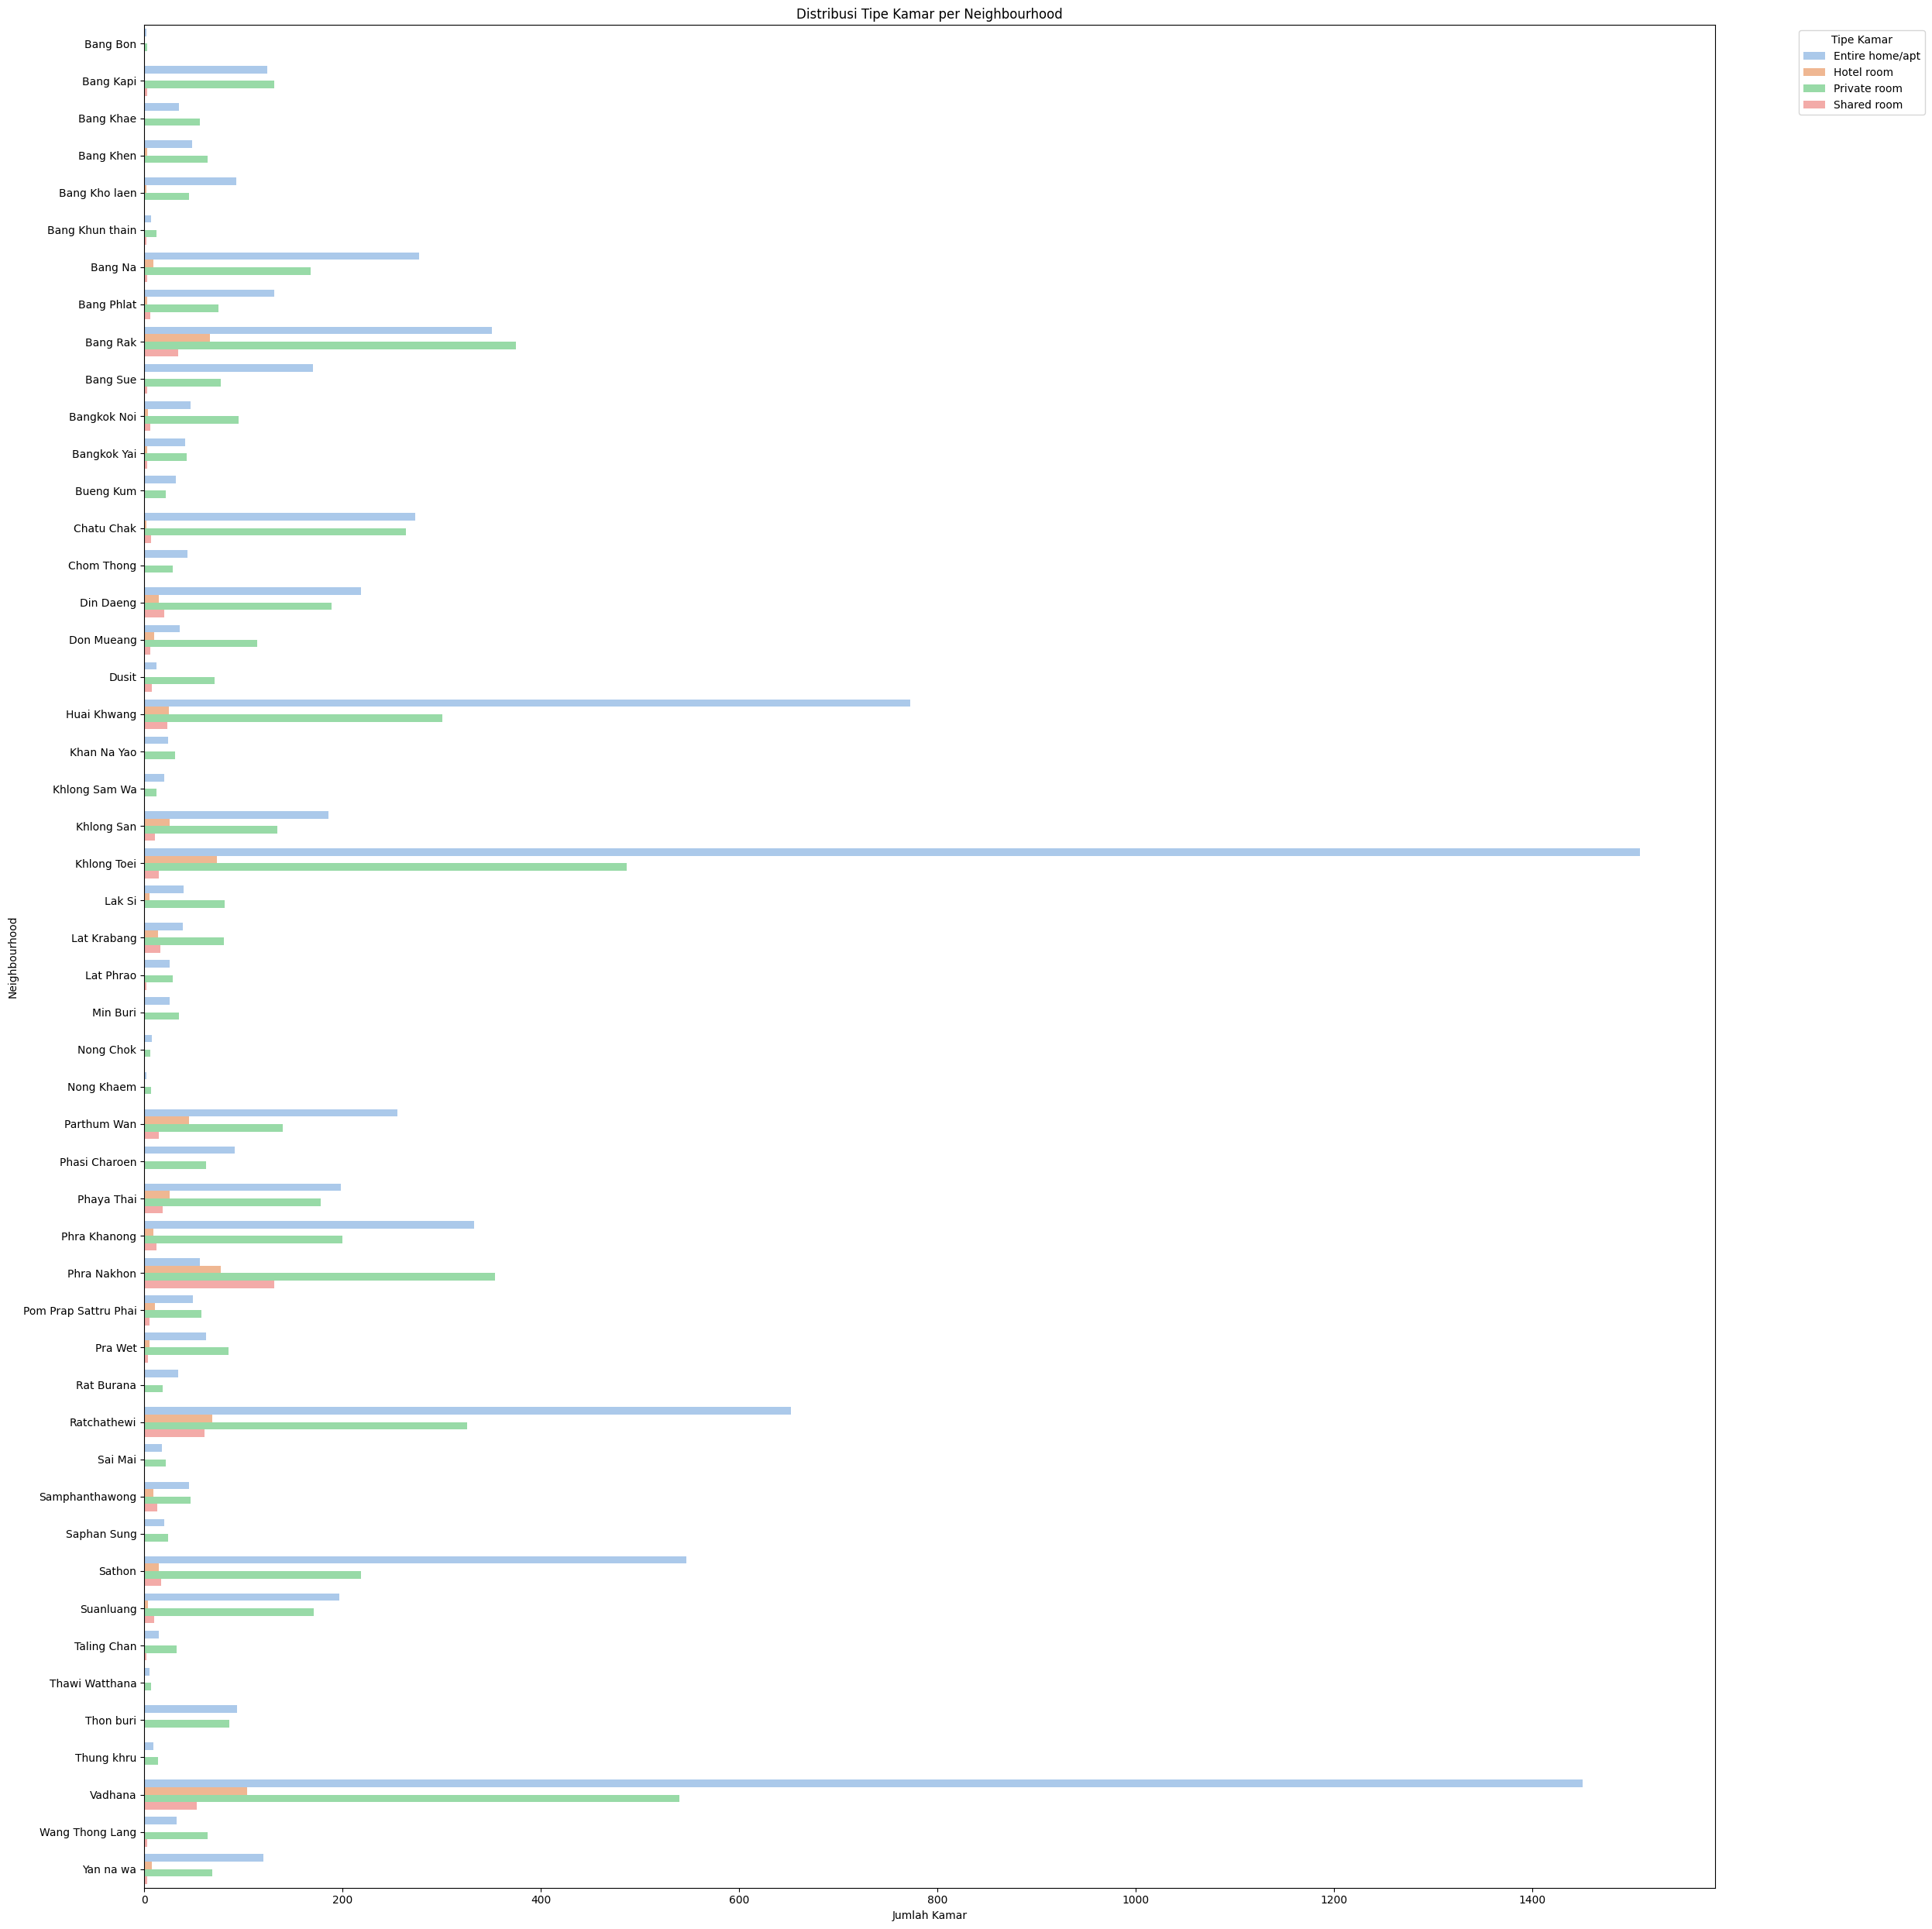

In [ ]:
#Visualisasi distribusi tipe kamar per neighbour
plt.figure(figsize=(25, 25))
sns.barplot(data=distribution_roomtype, y='neighbourhood', x='count', hue='room_type', palette='pastel', orient='h')

# Pengaturan tampilan
plt.title('Distribusi Tipe Kamar per Neighbourhood')
plt.xlabel('Jumlah Kamar')
plt.ylabel('Neighbourhood')
plt.legend(title='Tipe Kamar', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menempatkan legenda di luar plot
plt.tight_layout()
plt.show()

**Insight:**

1. Jumlah tipe kamar terbanyak di Bangkok adalah tipe Entire Home/apt dan Private Room dengan masing-masing berjumlah 8879 dan 5754 dengan persentase sebesar 56.2% dan 36.4% dari total properti. 
2. Jumlah tipe kamar per Zona terbanyak terdapat pada Inner Zone dan Middle Zone dengan tipe kamar Entire Home/apt dengan jumlah 7141 dan 1538 dengan persentase sebesar 58.2% dan 53.3% dari total properti. 
3. Jumlah tipe kamar terbanyak pada Outer Zone adalah kamar dengan tipe Private Room yaitu sebesar 390 penginapan. 
4. Tipe kamar Entire home/apt memiliki jumlah terbesar di daerah **Khlong Toei**, tipe kamar Hotel room dan Private room memiliki jumlah terbesar di daerah **Vadhana** dan tipe kamar Private room terbanyak terdapat di daerah **Phra Nakhon**. Semua daerah tersebut berada dalam Zona Inner Zone. 
5. Tipe kamar Entire home/apt dan Private rooms terendah terdapat pada daerah **Bang Bon** yang berada pada Outer Zone. Sedangkan tipe kamar Hotel room dan Shared room terendah terdapat pada daerah **Bang Kapi** di Middle Zone.
6. Distribusi tipe kamar di setiap daerah belum merata, ada beberapa daerah/neighbourhood yang tidak memiliki semua tipe kamar.

**Kesimpulan:**


Tipe kamar yang paling banyak disewakan di Airbnb Bangkok ada tipe Entire home/apt dan Private Rooms. Kedua tipe ini memiliki jumlah yang sangat tinggi di setiap zona. Daerah yang paling banyak menyediakan kamar yaitu Khlong Toei, Vadhana dan Phra Nakhon.Tipe kamar Entire home/apt memiliki fasilitas yang lebih banyak seperti kamar tidur, kamar mandi dan dapur tersendiri. Untuk tipe kamar private rooms juga memiliki fasilitas kamar tidur dan kamar mandi sendiri namun untuk ruang lainnya berbagi dengan penyewa atau host. Sehingga ini paling banyak disewa oleh pengguna. Berdasarkan neighbourhood, pada Zona Outer dan Middle tidak semua daerah menyediakan semua tipe kamar. Hal ini pihak airbnb bisa mengajak host daerah tersebut untuk membuka penginapan dengan tipe yang belum tersedia di daerah tersebut. 


Sumber: https://www.airbnb.com/help/article/5?locale=en&_set_bev_on_new_domain=1685440442_M2ZmOGRlNGU3MjE4#section-heading-0-0


**3. Analisis Harga Sewa Kamar**

Melalui analisis harga sewa Airbnb di setiap kawasan, kita dapat melihat perbedaan harga yang ada di berbagai lokasi di Bangkok. Hal ini akan memberikan wawasan mengenai segmentasi harga berdasarkan lokasi. Bagi pemilik properti dan pihak Airbnb, analisis ini berguna untuk menetapkan harga yang kompetitif dan sesuai dengan kondisi pasar di setiap kawasan.

Pertanyaanya:
1. Berapa rata-rata harga sewa masing-masing zona?
2. Berapa rata-rata harga sewa di masing-masing tipe kamar?

In [ ]:
#Mengitung rata-rata harga sewa kamar di Bangkok
rata2_harga = df['price'].median()
rata2_harga

np.float64(1426.0)

In [ ]:
#Menghitung rata-rata harga berdasarkan Zona
rata2_harga_perzona = df.groupby(['Zona'])[['price']].median()
rata2_harga_perzona

,price
Zona,
Inner Zone,1500.0
Middle Zone,999.0
Outer Zone,928.5


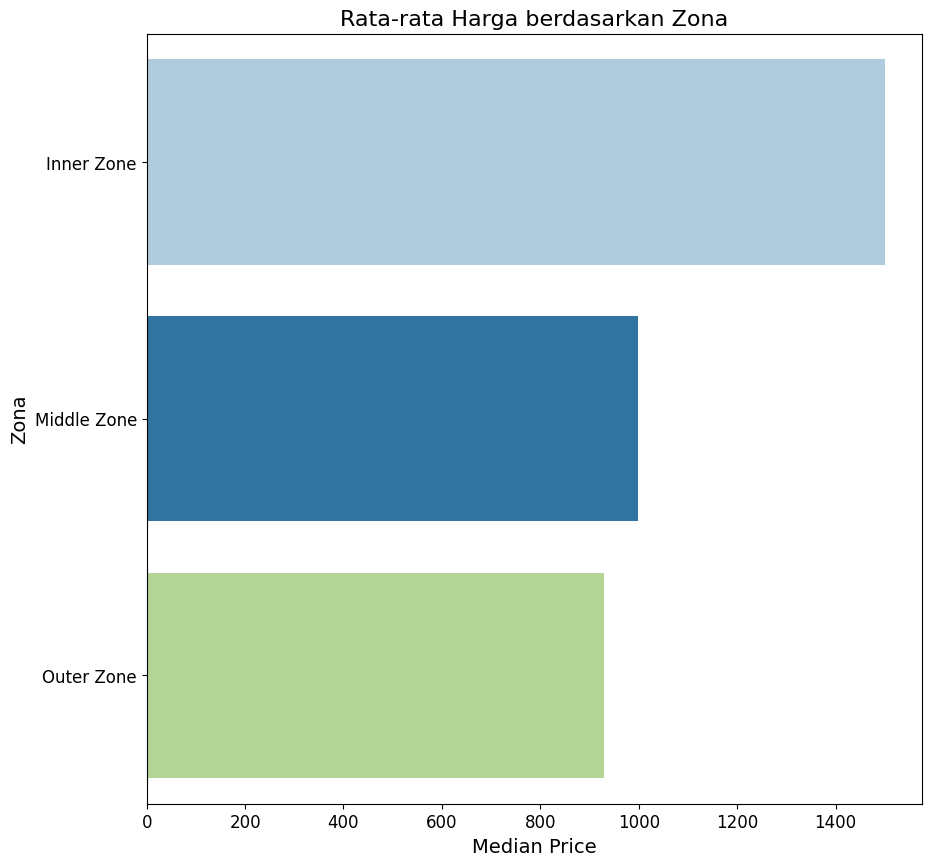

In [ ]:
#Visualisasi rata-rata harga berdasarkan zona
plt.figure(figsize=(10, 10))
sns.barplot(x='price', y='Zona', hue='Zona', palette='Paired', data=rata2_harga_perzona, estimator=np.median, ci=None)

plt.title('Rata-rata Harga berdasarkan Zona', fontsize=16)  
plt.xlabel('Median Price', fontsize=14)  
plt.ylabel('Zona', fontsize=14)    
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

In [ ]:
#Menghitung rata-rata harga berdasarkan Zona dan Neigbourhood
rata2_harga = df.groupby (['Zona', 'neighbourhood'])['price'].median().reset_index()
rata2_harga

#Mengurutkan data frame berdasarkan rata-rata harha secara menurun
neighbourhood_order = rata2_harga.sort_values(by='price', ascending=False)
neighbourhood_order

#Groupby rata-rata harga berdasarkan tipe kamar dan zona
rata2_harga_zonaneighbourhood = df.groupby(['Zona', 'neighbourhood'])[['price']].median()
rata2_harga_zonaneighbourhood

price
Zona        neighbourhood               
Inner Zone  Bang Kho laen         1265.0
            Bang Rak              1850.0
            Bang Sue               900.0
            Bangkok Noi            994.5
            Bangkok Yai           1435.5
            Chatu Chak            1100.0
            Din Daeng             1129.0
            Dusit                 1247.0
            Huai Khwang           1351.0
            Khlong San            1350.0
            Khlong Toei           1700.0
            Parthum Wan           2400.0
            Phaya Thai            1394.0
            Phra Nakhon           1113.0
            Pom Prap Sattru Phai  1709.0
            Ratchathewi           1536.0
            Samphanthawong        2000.0
            Sathon                1287.0
            Thon buri             1120.0
            Vadhana               2000.0
            Yan na wa             1493.5
Middle Zone Bang Kapi              914.0
            Bang Khae              911.0
            Bang Khen              882.0
            Bang Na               1000.0
            Bang Phlat             900.0
            Bueng Kum             1085.0
            Chom Thong            1200.0
            Khan Na Yao           1156.0
            Lat Phrao             1500.0
            Phasi Charoen          950.0
            Phra Khanong          1000.0
            Pra Wet                950.0
            Rat Burana            1000.0
            Sai Mai                971.5
            Saphan Sung            970.0
            Suanluang             1000.0
            Thung khru            1057.0
            Wang Thong Lang        815.0
Outer Zone  Bang Bon              1200.0
            Bang Khun thain       1000.0
            Don Mueang             831.5
            Khlong Sam Wa         1340.0
            Lak Si                 850.0
            Lat Krabang            990.0
            Min Buri               945.0
            Nong Chok             2539.0
            Nong Khaem             658.0
            Taling Chan           1502.5
            Thawi Watthana        1500.0

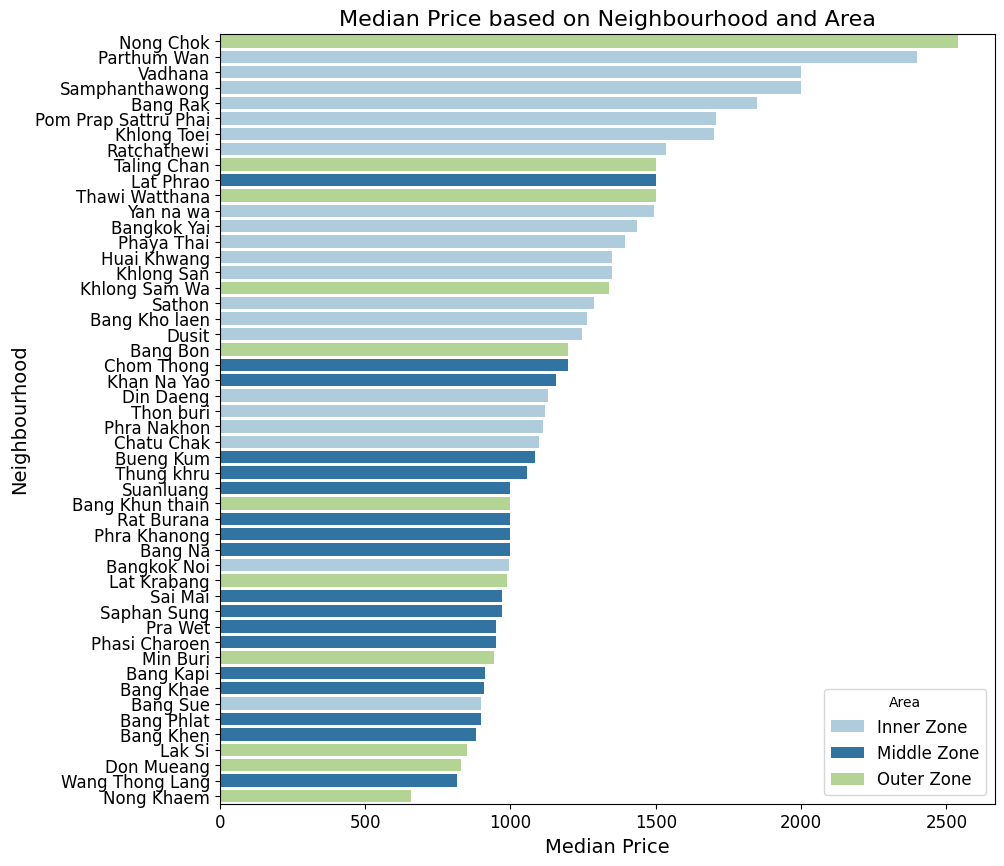

In [ ]:
#Visualisasi rata-rata harga berdasarkan Zona dan Neighbourhood
plt.figure(figsize=(10, 10))  # Memperbesar ukuran plot
sns.barplot(x='price', y='neighbourhood', hue='Zona', palette='Paired', data=rata2_harga, order=neighbourhood_order['neighbourhood'], estimator=np.median, ci=None)
plt.title('Median Price based on Neighbourhood and Area', fontsize=16)  
plt.xlabel('Median Price', fontsize=14)  
plt.ylabel('Neighbourhood', fontsize=14)  
plt.legend(title='Area', fontsize=12)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

In [ ]:
#Menghitung rata-rata harga berdasarkan tipe kamar
rata2_harga_perkamar = df.groupby(['room_type'])[['price']].median()
rata2_harga_perkamar

,price
room_type,
Entire home/apt,1529.0
Hotel room,1700.0
Private room,1212.0
Shared room,500.0


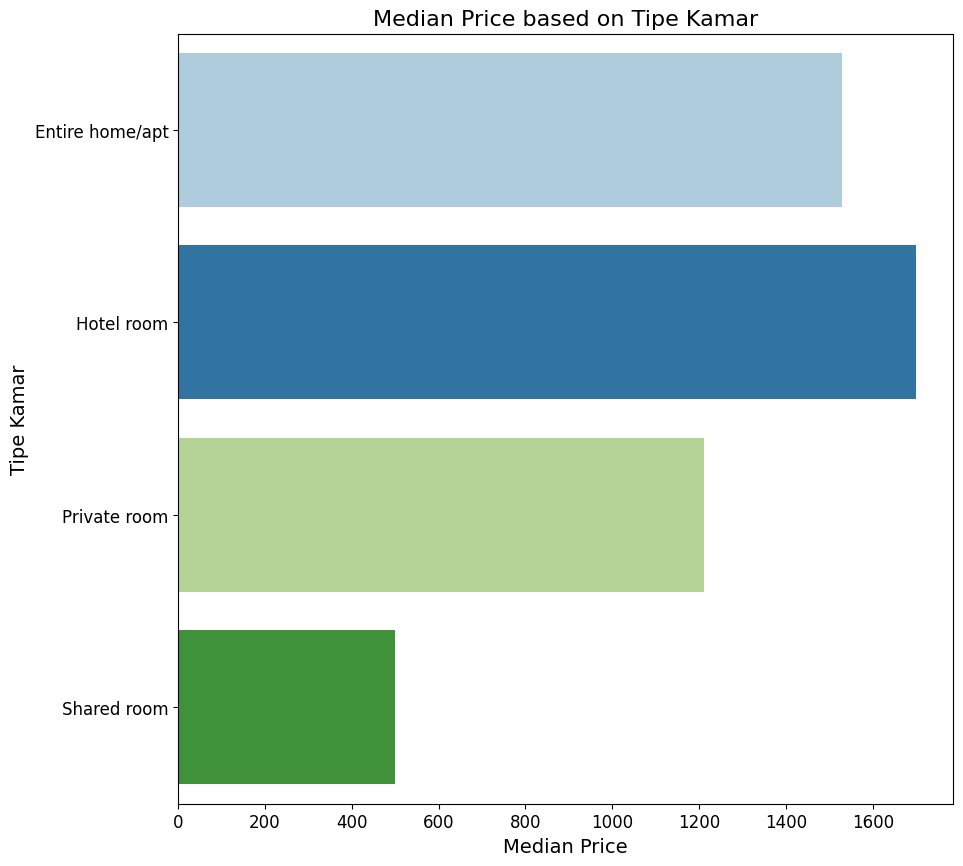

In [ ]:
#Visualisasi rata-rata harga berdasarkan tipe kamar
#Visualisasi rata-rata harga berdasarkan tipe kamar dan zona
plt.figure(figsize=(10, 10))  # Memperbesar ukuran plot
sns.barplot(x='price', y='room_type', palette='Paired', data=rata2_harga_perkamar, estimator=np.median, ci=None)
plt.title('Median Price based on Tipe Kamar', fontsize=16)  
plt.xlabel('Median Price', fontsize=14)  
plt.ylabel('Tipe Kamar', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

In [ ]:
#Groupby rata-rata harga berdasarkan tipe kamar dan zona
rata2_harga_perkamarzona = df.groupby(['room_type', 'Zona'])[['price']].median()
rata2_harga_perkamarzona

price
room_type       Zona               
Entire home/apt Inner Zone   1657.0
                Middle Zone  1000.0
                Outer Zone   1352.0
Hotel room      Inner Zone   1787.0
                Middle Zone  1363.0
                Outer Zone    990.0
Private room    Inner Zone   1400.0
                Middle Zone   960.0
                Outer Zone    850.0
Shared room     Inner Zone    500.0
                Middle Zone   500.0
                Outer Zone    390.0

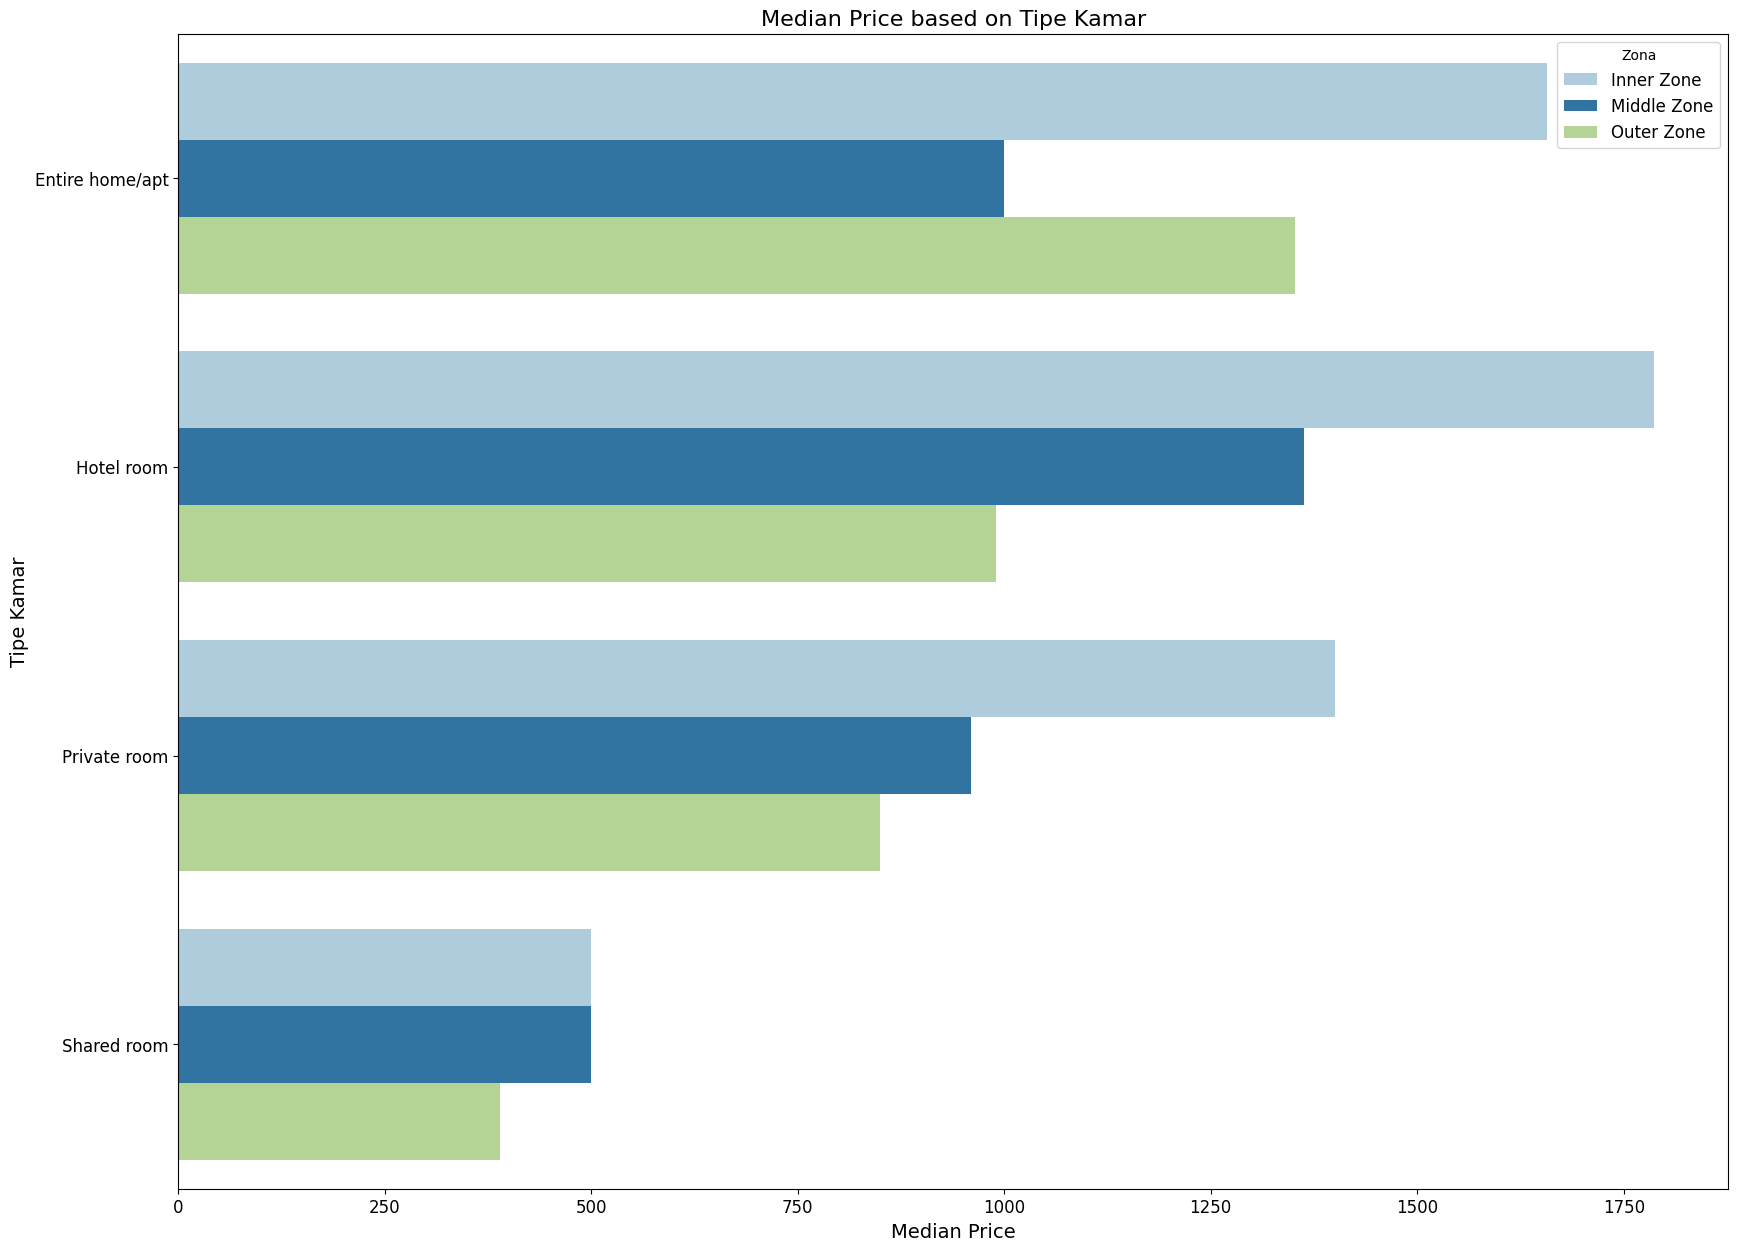

In [ ]:
#Visualisasi rata-rata harga berdasarkan tipe kamar dan zona
plt.figure(figsize=(20, 15))  # Memperbesar ukuran plot
sns.barplot(x='price', y='room_type', hue='Zona', palette='Paired', data=rata2_harga_perkamarzona, estimator=np.median, ci=None)
plt.title('Median Price based on Tipe Kamar', fontsize=16)  
plt.xlabel('Median Price', fontsize=14)  
plt.ylabel('Tipe Kamar', fontsize=14)  
plt.legend(title='Zona', fontsize=12)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

**Insight:**
1. Rata-rata harga sewa kamar di Bangkok adalah 1426 Baht
2. Rata-rata harga sewa kamar berdasarkan Zona yang paling tinggi terdapat pada **Inner Zone** yaitu sebesar 1500 Baht
3. Rata-rata harga sewa kamar berdasarkan Neighbourhood yang paling tinggi terdapat pada daerah **Nong Chok** yaitu sebesar 2539 Baht. Nong Chok berada pada Outer Zone. Hal ini mungkin disebabkan karena ketersediaan properti pada Outer zone terbatas, sehingga harga sewanya lebih tinggi dibandingkan dengan daerah lain. 
4. Rata-rata harga sewa kamar berdasarkan tipe kamar yang paling tinggi terdapat pada tipe kamar **Hotel rooms** yaitu sebesar 1700 Baht. 
5. Rata-rata harga sewa kamar berdasarkan tipe kamar dan Zona yang paling tinggi terdapat pada tipe kamar **Hotel rooms** di **Inner Zone** yaitu sebesar 1787 Baht. Hal ini mungkin dikarenakan aksesibilitas yang lebih mudah ke tempat-tempat wisata dan pusat bisnis terletak di daerah pusat kota.

**Kesimpulan:**

Rata-rata harga sewa di Kota Bangkok berkisar antara 658 - 2539 Baht, Inner zone memiliki rata-rata harga tertinggi yaitu sebesar 1500 Baht. Harga sewa tertinggi berada pada daerah **Nong Chock** yang terdapat pada **Outer Zone** Hal ini mungkin disebabkan karena ketersediaan properti pada Outer zone terbatas, sehingga harga sewanya lebih tinggi dibandingkan dengan daerah lain. ata-rata harga sewa kamar berdasarkan tipe kamar dan Zona yang paling tinggi terdapat pada tipe kamar **Hotel rooms** di **Inner Zone** yaitu sebesar 1787 Baht. Hal ini mungkin dikarenakan aksesibilitas yang lebih mudah ke tempat-tempat wisata dan pusat bisnis terletak di daerah pusat kota.

**Kesimpulan:**

1. Total listing yang terdapat pada Airbnb Bangkok berjumlah 15801. Jumlah listing terbanyak terdapat pada Inner Zone yaitu sebanyak 12268 dengan persentase sebesar 77.6% dari total keseluruhan. Daerah dengan jumlah listing terbanyak pada Inner Zone yaitu: Vadhana, Khlong Tei, Huai Khwang, Ratchatewi dan Bangrak. Hal ini dikarenakan Inner Zone merupakan wilayah pusat untuk kegiatan Ekonomi, perbelanjaan, tempat wisata dan hiburan atau dikenal dengan pusat kota. Oleh karena itu, banyak turis atau wisatawan berkunjung ke daerah Inner Zone. Selain itu, fasilitas atau akses yang terdapat pada Inner Zone lebih banyak dibandingkan dengan Zona lain. Jumlah listing terendah terdapat pada Outer Zone, hal ini dikarenakan outer zone merupakan wilayah pinggiran kota Bangkok dan cukup jauh dari pusat kota. Sehingga akses untuk menuju ke Outer Zone tidak bisa dijangkau oleh semua mode transport, hanya mode tertentu. Distribusi listing di setiap Zona masih belum merata, terutama pada Outer zone masih ada daerah yang memiliki listing <10.

2. Tipe kamar yang paling banyak disewakan di Airbnb Bangkok ada tipe Entire home/apt dan Private Rooms masing-masing sebesar 56.2% dan 36.4% dari total keseluruhan. Kedua tipe ini memiliki jumlah yang sangat tinggi di setiap zona. Daerah yang paling banyak menyediakan kamar yaitu Khlong Toei, Vadhana dan Phra Nakhon. Tipe kamar Entire home/apt memiliki fasilitas yang lebih banyak seperti kamar tidur, kamar mandi dan dapur tersendiri. Untuk tipe kamar private rooms juga memiliki fasilitas kamar tidur dan kamar mandi sendiri namun untuk ruang lainnya berbagi dengan penyewa atau host. Sehingga ini paling banyak disewa oleh pengguna. Berdasarkan Zona, pada Zona Outer dan Middle tidak semua daerah menyediakan semua tipe kamar. Dari hal ini pihak airbnb bisa mengajak host daerah tersebut untuk membuka listings atau penginapan dengan tipe kamar yang belum tersedia di daerah tersebut. 

3. Rata-rata harga sewa di Kota Bangkok berkisar antara 658 - 2539 Baht, Inner zone memiliki rata-rata harga tertinggi yaitu sebesar 1500 Baht. Harga sewa tertinggi berada pada daerah Nong Chock yang terdapat pada Outer Zone Hal ini mungkin disebabkan karena ketersediaan properti pada Outer zone yang terbatas, sehingga harga sewanya lebih tinggi dibandingkan dengan daerah lain. Rata-rata harga sewa kamar berdasarkan tipe kamar dan Zona yang paling tinggi terdapat pada tipe kamar Hotel rooms di Inner Zone yaitu sebesar 1787 Baht. Hal ini mungkin dikarenakan aksesibilitas yang lebih mudah ke tempat-tempat wisata dan pusat bisnis terletak di daerah pusat kota.

**Rekomendasi:**


Dari hasil analisis, ada beberapa rekomendasi yang dapat diberikan kepada pihak Airbnb untuk meningkatkan ketersediaan dan kualitas layanan, serta untuk memaksimalkan pengalaman pengguna dan potensi keuntungan di Bangkok:

**1. Distribusi Listing yang Lebih Merata**

**- Strategi Penambahan Listing di Outer Zone:** Dengan banyaknya wisatawan yang memilih untuk tinggal di Inner Zone, Airbnb dapat mempertimbangkan insentif bagi tuan rumah (host) di Outer Zone untuk meningkatkan listing di area ini. Hal ini bisa dilakukan dengan memberikan potongan biaya atau komisi yang lebih rendah kepada host baru di Outer Zone atau mendukung strategi pemasaran untuk menyoroti daya tarik dan keunikan wilayah pinggiran.

**-Pengembangan Infrastruktur Aksesibilitas:** Pihak Airbnb dapat bekerja sama dengan pemerintah daerah untuk meningkatkan infrastruktur transportasi di Outer Zone. Dengan akses transportasi yang lebih baik, Outer Zone akan menjadi lebih menarik bagi wisatawan yang ingin menghemat biaya penginapan sambil menikmati ketenangan daerah pinggiran.

**- Segmentasi Pemasaran:** Memasarkan Outer Zone sebagai lokasi ideal untuk wisatawan yang menginginkan pengalaman yang lebih lokal dan tenang, dengan penginapan di area perumahan atau dekat alam, untuk menarik tipe wisatawan yang berbeda. Bisa diberikan diskon harga untuk penginapan di Zona ini.

**2. Peningkatan Tipe Kamar yang Kurang Tersedia**

**- Mendorong Ketersediaan Kamar yang Bervariasi di Outer dan Middle Zone:** Berdasarkan analisis, tidak semua tipe kamar tersedia di setiap zona, terutama di Outer dan Middle Zone. Airbnb dapat mengajak host di area ini untuk menyediakan tipe kamar seperti Entire home/apt atau Private room yang populer. Ini bisa dilakukan dengan memberikan informasi tentang permintaan kamar dan potensi keuntungan dari tipe-tipe kamar yang kurang tersedia.

**3. Penyesuaian Harga Berdasarkan Zona dan Tipe Kamar**

**- Optimalisasi Harga Sewa di Outer Zone:** Meskipun rata-rata harga sewa di Outer Zone lebih rendah, daerah tertentu seperti Nong Chok memiliki harga yang cukup tinggi karena ketersediaan properti terbatas. Airbnb dapat membantu host di Outer Zone untuk menentukan harga sewa yang lebih kompetitif, sehingga wisatawan tidak merasa harga di pinggiran kota lebih tinggi daripada di pusat kota.

**- Strategi Penetapan Harga Berdasarkan Tipe Kamar di Inner Zone:** Karena kamar tipe Hotel room di Inner Zone memiliki harga rata-rata yang tertinggi, Airbnb dapat memanfaatkan data ini untuk menyarankan harga optimal kepada host yang menyediakan hotel room, sambil mempertahankan persaingan di pasar dengan memberikan diskon atau promosi pada waktu tertentu (seperti di luar musim liburan).

**4. Peningkatan Aksesibilitas dan Fasilitas di Outer dan Middle Zone**

**- Pengembangan Atraksi dan Fasilitas Lokal:** Menambah atraksi di Outer dan Middle Zone, seperti pusat budaya, kuliner lokal, dan tempat wisata alam, dapat membuat wilayah ini lebih menarik bagi wisatawan. Airbnb bisa bekerja sama dengan komunitas setempat untuk meningkatkan daya tarik dan fasilitas di zona-zona ini.

**- Promosi Akses Fasilitas Umum:** Airbnb dapat memberikan informasi mengenai fasilitas umum di Outer Zone, seperti stasiun transportasi, pusat perbelanjaan, dan tempat makan, sehingga wisatawan merasa nyaman tinggal di zona ini meskipun jauh dari pusat kota.